<a href="https://colab.research.google.com/github/Sarthakpunj/EDA_DA_1_FINAL/blob/main/21BDS0115_Sarthak_Punj_EDA_Theory_DA_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset 21BDS0115:
   Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  

Summary statistics of the dataset 21BDS0115:
        Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  \
count        240.000000              240    240.000000   
unique              NaN              208           NaN   
top                 NaN         

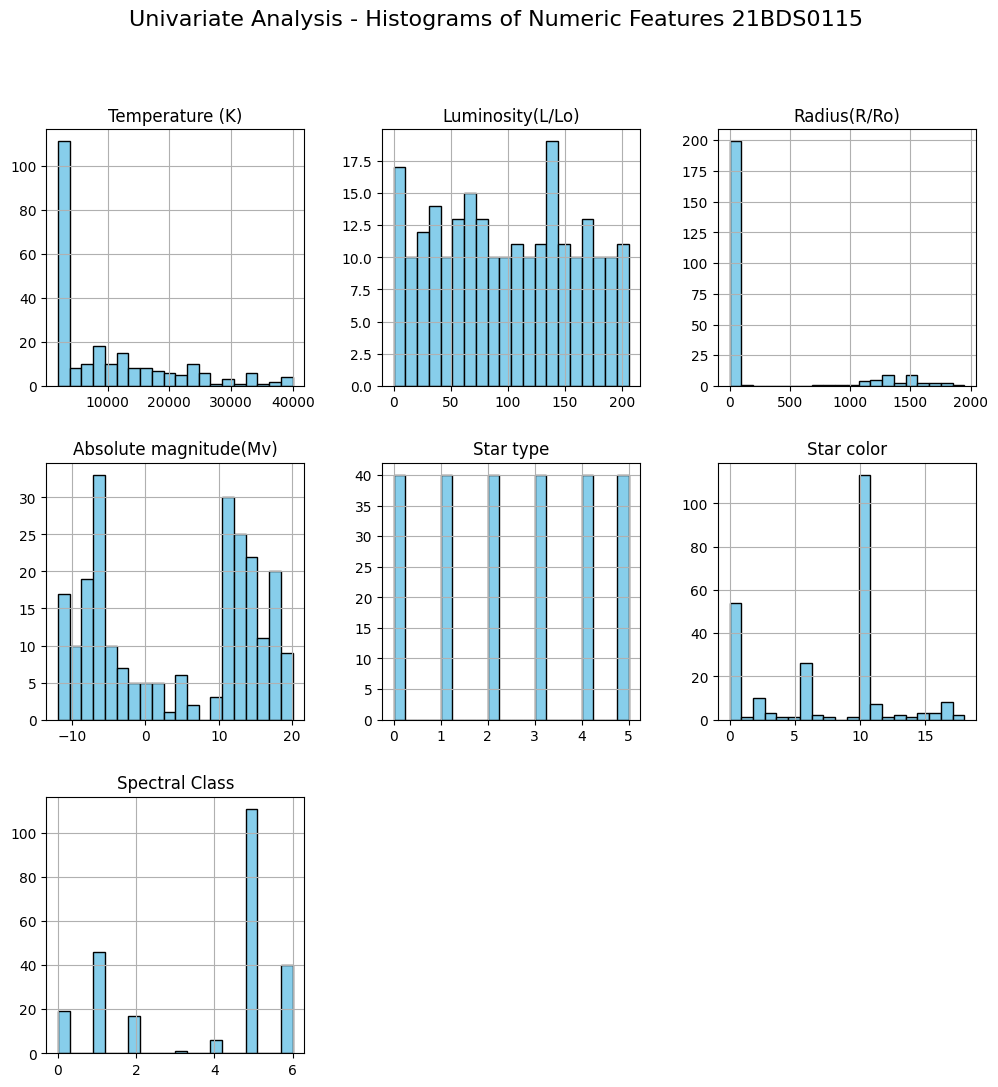

<ipython-input-8-4e4a87fab288>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Star type', data=df, palette='viridis')
<ipython-input-8-4e4a87fab288>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Star color', data=df, palette='inferno')


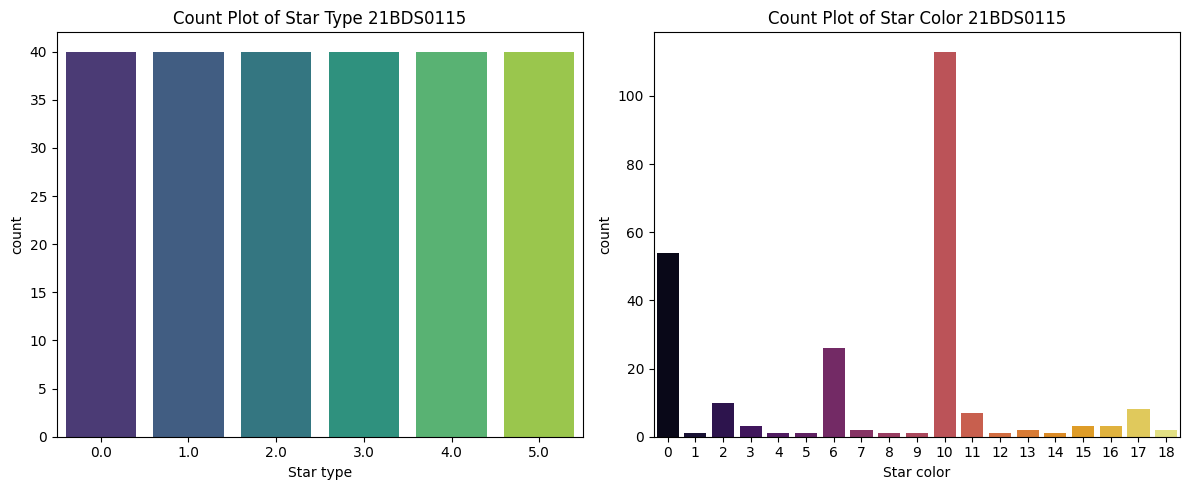

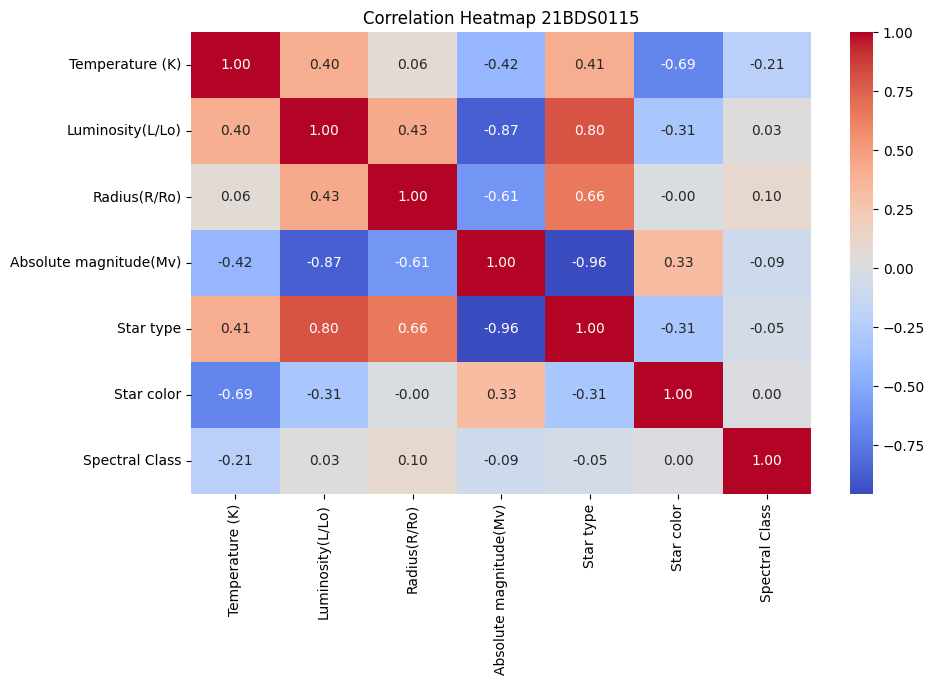

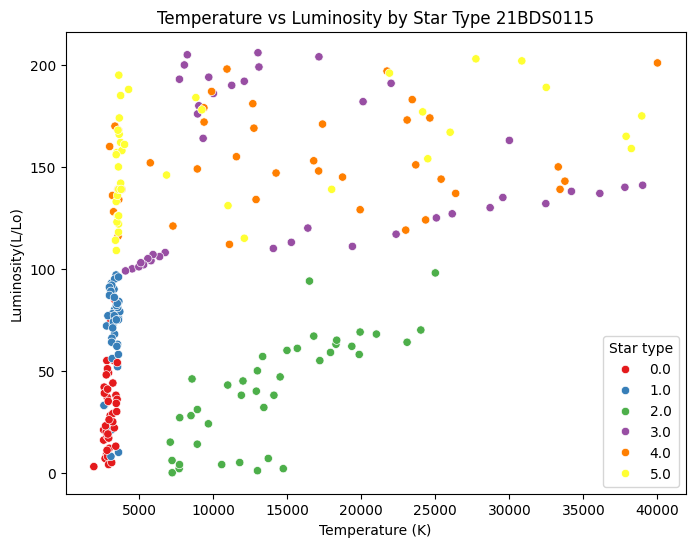

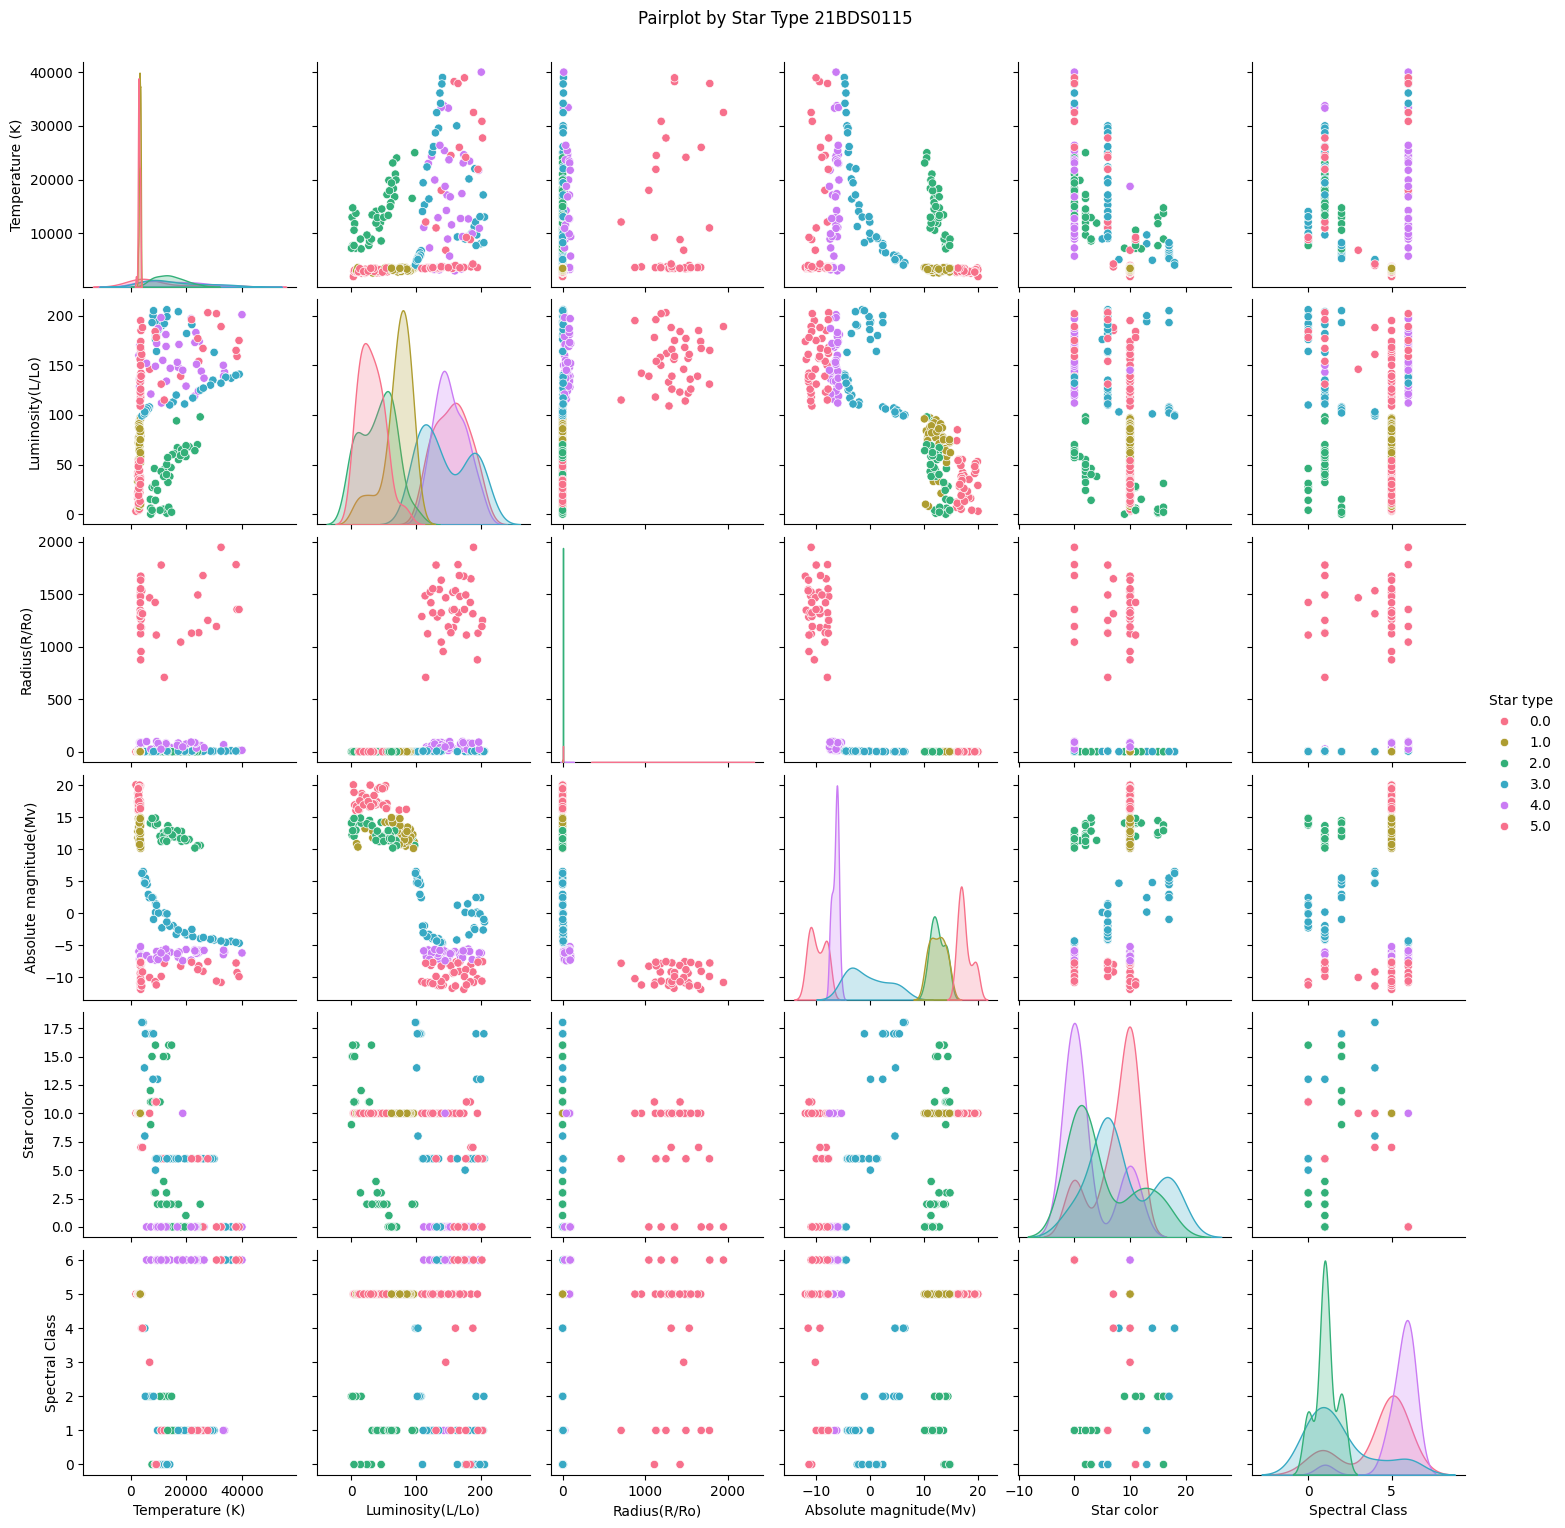

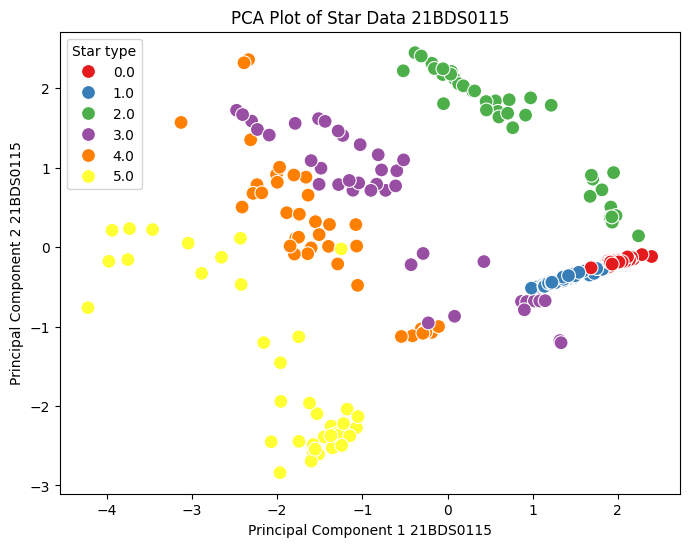


Explained Variance by PCA components 21BDS0115: [0.45509579 0.24136125]


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = '/content/stars type.csv'
df = pd.read_csv(url)


print("First 5 rows of the dataset 21BDS0115:")
print(df.head())


print("\nSummary statistics of the dataset 21BDS0115:")
print(df.describe(include='all'))


print(f"\nDataset dimensions 21BDS0115: {df.shape[0]} rows and {df.shape[1]} columns")


print("\nChecking data types and null values 21BDS0115:")
print(df.info())
print("\nMissing values per column 21BDS0115:\n", df.isnull().sum())


print("\nHandling missing data by replacing '?' and NaN values 21BDS0115")


df.replace('?', np.nan, inplace=True)


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=[object]).columns


df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Missing values after imputation 21BDS0115:\n", df.isnull().sum())

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nConverted categorical variables into numeric 21BDS0115:")
print(df.head())


df.drop_duplicates(inplace=True)

print(f"\nAfter cleaning, dataset dimensions 21BDS0115: {df.shape[0]} rows and {df.shape[1]} columns")


df.hist(figsize=(12, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis - Histograms of Numeric Features 21BDS0115', fontsize=16)
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Star type', data=df, palette='viridis')
plt.title('Count Plot of Star Type 21BDS0115')

plt.subplot(1, 2, 2)
sns.countplot(x='Star color', data=df, palette='inferno')
plt.title('Count Plot of Star Color 21BDS0115')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap 21BDS0115')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', palette='Set1', data=df)
plt.title('Temperature vs Luminosity by Star Type 21BDS0115')
plt.show()


sns.pairplot(df, hue='Star type', palette='husl')
plt.suptitle('Pairplot by Star Type 21BDS0115', y=1.02)
plt.show()

X = df.drop('Star type', axis=1)
y = df['Star type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=100)
plt.title('PCA Plot of Star Data 21BDS0115')
plt.xlabel('Principal Component 1 21BDS0115')
plt.ylabel('Principal Component 2 21BDS0115')
plt.show()


explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance by PCA components 21BDS0115: {explained_variance}")


First 5 rows of the dataset:
    Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64 

<ipython-input-9-ea0d873c779a>:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-9-ea0d873c779a>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Temp_Bin', data=df_cleaned, palette='viridis')


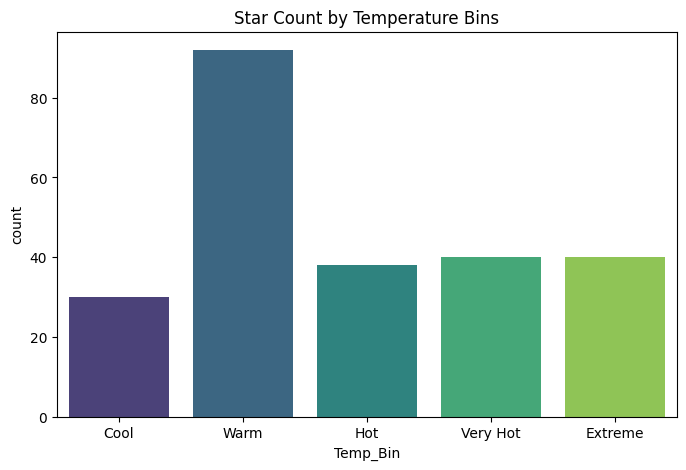

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = '/content/stars type.csv'
df = pd.read_csv(url)


print("First 5 rows of the dataset:\n", df.head())
print("\nDataset Info:\n", df.info())


df1 = df.iloc[:len(df)//2].copy()  # First half of the dataset
df2 = df.iloc[len(df)//2:].copy()  # Second half of the dataset

print("\nFirst half (df1) of the dataset:\n", df1.head())
print("\nSecond half (df2) of the dataset:\n", df2.head())

# 1. Concatenation using pd.concat
# Concatenate along rows (axis=0)
concat_rows = pd.concat([df1, df2], axis=0)
print("\nConcatenated DataFrame (along rows):\n", concat_rows.head())

# Concatenate along columns (axis=1)
concat_cols = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
print("\nConcatenated DataFrame (along columns):\n", concat_cols.head())

# 2. Merge demonstration using pd.merge
# Adding an ID column to each DataFrame for merging
df1['ID'] = range(1, len(df1) + 1)
df2['ID'] = range(1, len(df2) + 1)

# Merging df1 and df2 on 'ID' with 'inner' join
merged_inner = pd.merge(df1, df2, on='ID', how='inner')
print("\nMerged DataFrame (inner join on 'ID'):\n", merged_inner.head())

# Merging with 'left' join
merged_left = pd.merge(df1, df2, on='ID', how='left')
print("\nMerged DataFrame (left join on 'ID'):\n", merged_left.head())

# Merging with 'right' join
merged_right = pd.merge(df1, df2, on='ID', how='right')
print("\nMerged DataFrame (right join on 'ID'):\n", merged_right.head())

# 3. Data Deduplication
print("\nChecking for duplicate rows:\n", df.duplicated())
print("\nBefore removing duplicates: ", df.shape)
df = df.drop_duplicates()
print("After removing duplicates: ", df.shape)

# 4. Replacing '?' with NaN
df.replace('?', np.nan, inplace=True)
print("\nMissing values after replacing '?' with NaN:\n", df.isnull().sum())

# 5. Handling Missing Data (Forward Fill, Drop NaN)
df.fillna(method='ffill', inplace=True)
print("\nMissing values after forward filling:\n", df.isnull().sum())

# Checking and displaying total missing values
print("\nTotal missing values in the dataset:", df.isnull().sum().sum())

# 6. Counting non-missing values
print("\nCount of non-missing values for each column:\n", df.count())

# 7. Dropping columns with all NaN values
df_cleaned = df.dropna(how='all', axis=1)
print("\nAfter dropping columns where all values are NaN:\n", df_cleaned.info())

# 8. Convert 'Luminosity(L/Lo)' to numeric (if there are issues)
df_cleaned['Luminosity(L/Lo)'] = pd.to_numeric(df_cleaned['Luminosity(L/Lo)'], errors='coerce')
print("\nLuminosity after converting to numeric (first 5 values):\n", df_cleaned['Luminosity(L/Lo)'].head())

# 9. Mean and Cumulative Sum of 'Luminosity(L/Lo)' (for demonstration)
print("\nMean of Luminosity:", df_cleaned['Luminosity(L/Lo)'].mean())
print("\nCumulative sum of Luminosity:\n", df_cleaned['Luminosity(L/Lo)'].cumsum())

# 10. Binning/Discretization for Temperature
bins = [0, 3000, 6000, 12000, 20000, 40000]
bin_labels = ['Cool', 'Warm', 'Hot', 'Very Hot', 'Extreme']
df_cleaned['Temp_Bin'] = pd.cut(df_cleaned['Temperature (K)'], bins=bins, labels=bin_labels)
print("\nTemperature Binned:\n", df_cleaned[['Temperature (K)', 'Temp_Bin']].head())

# 11. Outlier Detection (Luminosity > 99th percentile threshold)
threshold = df_cleaned['Luminosity(L/Lo)'].quantile(0.99)
outliers = df_cleaned[df_cleaned['Luminosity(L/Lo)'] > threshold]
print("\nOutliers in Luminosity:\n", outliers)

# 12. Creating Dummy Variables for 'Spectral Class'
df_dummies = pd.get_dummies(df_cleaned['Spectral Class'], prefix='Spectral')
print("\nDummy Variables for Spectral Class:\n", df_dummies.head())

# 13. Concatenating the Dummies to the main dataframe
df_cleaned = pd.concat([df_cleaned, df_dummies], axis=1)
print("\nDataFrame after adding dummy variables:\n", df_cleaned.head())

# 14. Random Sampling (without replacement)
sample_df = df_cleaned.sample(n=10, replace=False)
print("\nRandom Sample of 10 rows:\n", sample_df)

# 15. Checking null values using isnull() and notnull()
print("\nNull value check (isnull):\n", df_cleaned.isnull().sum())
print("\nNon-null value check (notnull):\n", df_cleaned.notnull().sum())

# 16. Rename column for demonstration (Example: Renaming 'Star type' to 'Star_Type')
df_cleaned.rename(columns={'Star type': 'Star_Type'}, inplace=True)
print("\nRenamed 'Star type' column to 'Star_Type':\n", df_cleaned.head())

# Visualization for Binned Temperature
plt.figure(figsize=(8,5))
sns.countplot(x='Temp_Bin', data=df_cleaned, palette='viridis')
plt.title('Star Count by Temperature Bins')
plt.show()

Data Types 21BDS0115:
Temperature (K)             int64
Luminosity(L/Lo)           object
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object
Missing values in each column 21BDS0115:
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            0
dtype: int64


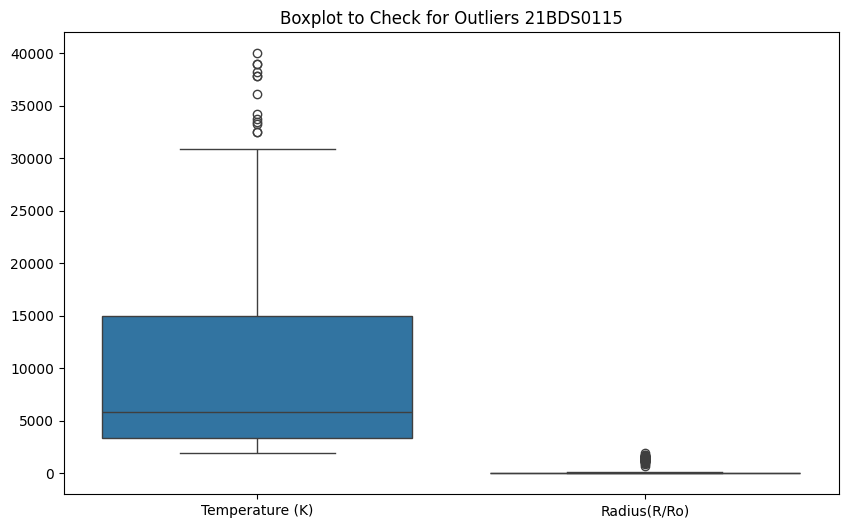

Mean 21BDS0115: 10425.872881355932 Median 21BDS0115: 5776.0 Mode 21BDS0115: 0    3600
Name: Temperature (K), dtype: int64


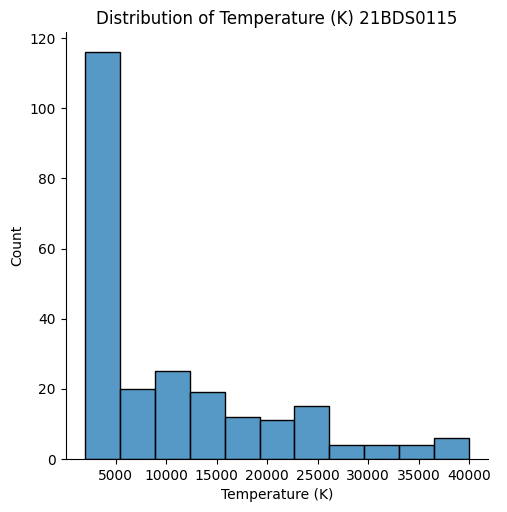

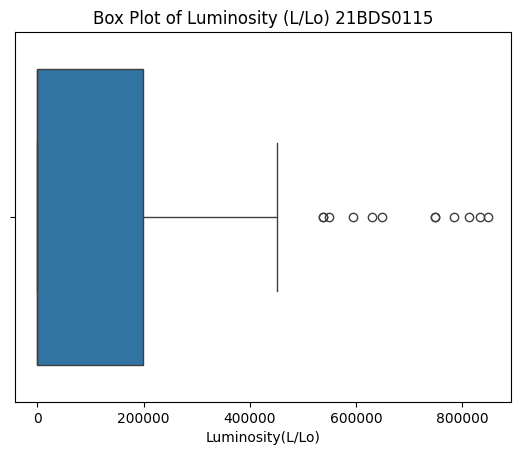

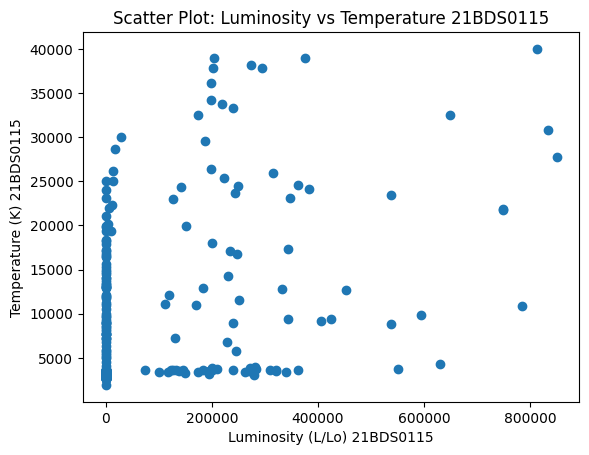

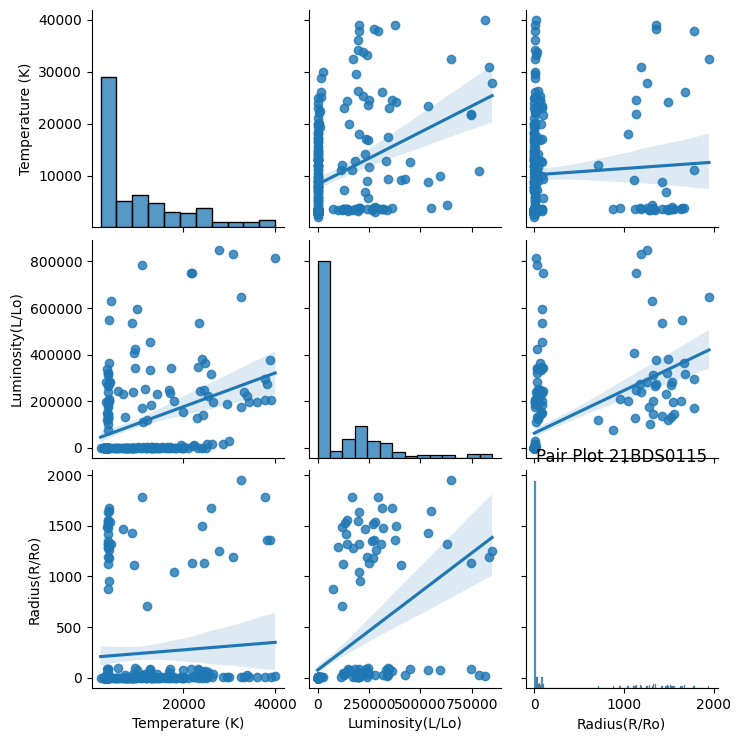

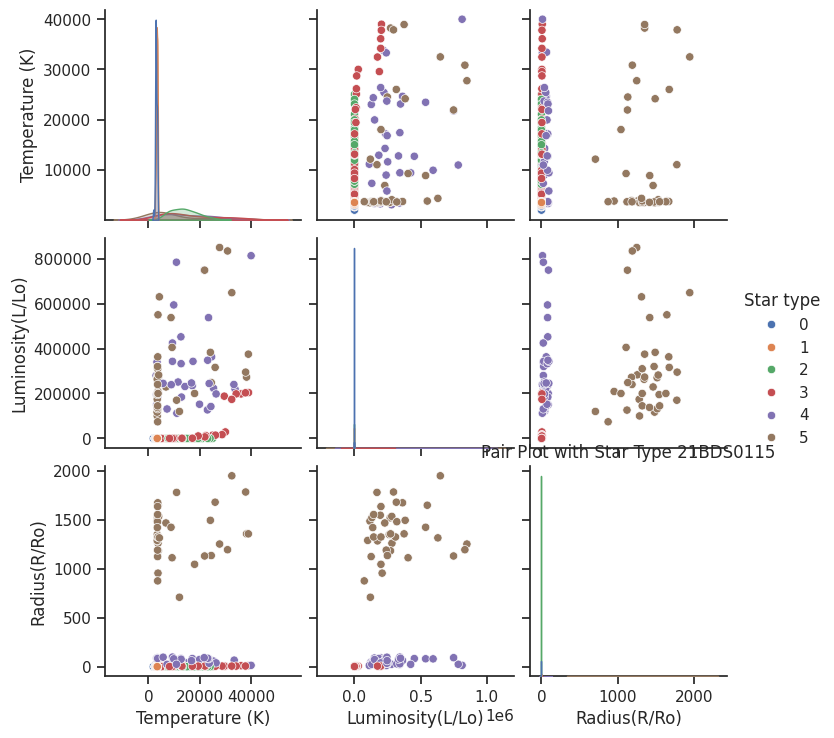

Correlation Matrix 21BDS0115:
                        Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
Temperature (K)                1.000000          0.382105      0.067218   
Luminosity(L/Lo)               0.382105          1.000000      0.531241   
Radius(R/Ro)                   0.067218          0.531241      1.000000   
Absolute magnitude(Mv)        -0.411594         -0.689485     -0.614111   

                        Absolute magnitude(Mv)  
Temperature (K)                      -0.411594  
Luminosity(L/Lo)                     -0.689485  
Radius(R/Ro)                         -0.614111  
Absolute magnitude(Mv)                1.000000  


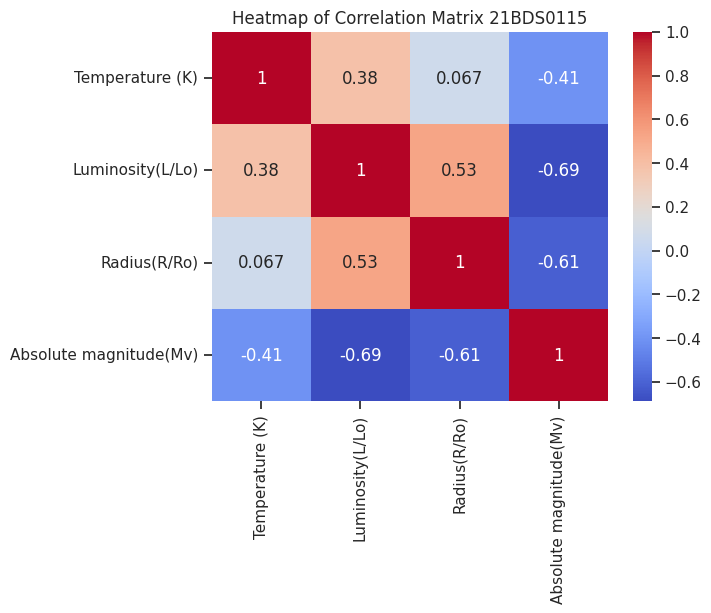

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/stars type.csv")


df.head()


print("Data Types 21BDS0115:")
print(df.dtypes)

print("Missing values in each column 21BDS0115:\n", df.isnull().sum())

# Drop rows or columns with a significant number of missing values (if any)
df.dropna(inplace=True)  # Alternatively, fill missing data with mean/median
# Example: df['Temperature (K)'].fillna(df['Temperature (K)'].mean(), inplace=True)

# Check for duplicates and remove if necessary
df.drop_duplicates(inplace=True)

# Check for outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)']])
plt.title("Boxplot to Check for Outliers 21BDS0115")
plt.show()

# Data type conversions (if necessary)
# Example: Convert 'Star type' to a categorical data type
df['Star type'] = df['Star type'].astype('category')

# Convert 'Temperature (K)', 'Luminosity(L/Lo)', and 'Radius(R/Ro)' to numeric
df['Temperature (K)'] = pd.to_numeric(df['Temperature (K)'], errors='coerce')
df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')
df['Radius(R/Ro)'] = pd.to_numeric(df['Radius(R/Ro)'], errors='coerce')

# Drop any rows with missing values after conversion to numeric
df_cleaned = df.dropna(subset=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'])

# Calculate mean, median, and mode for 'Temperature (K)'
mean_temp = df_cleaned["Temperature (K)"].mean()
median_temp = df_cleaned["Temperature (K)"].median()
mode_temp = df_cleaned["Temperature (K)"].mode()
print("Mean 21BDS0115:", mean_temp, "Median 21BDS0115:", median_temp, "Mode 21BDS0115:", mode_temp)

# Distribution Plot for 'Temperature (K)'
sns.FacetGrid(df_cleaned, height=5).map(sns.histplot, "Temperature (K)").add_legend()
plt.title("Distribution of Temperature (K) 21BDS0115")
plt.show()

# Box Plot for 'Luminosity(L/Lo)'
sns.boxplot(x="Luminosity(L/Lo)", data=df_cleaned)
plt.title("Box Plot of Luminosity (L/Lo) 21BDS0115")
plt.show()

# Scatter Plot: 'Luminosity(L/Lo)' vs 'Temperature (K)'
plt.scatter(df_cleaned["Luminosity(L/Lo)"], df_cleaned["Temperature (K)"])
plt.title("Scatter Plot: Luminosity vs Temperature 21BDS0115")
plt.xlabel("Luminosity (L/Lo) 21BDS0115")
plt.ylabel("Temperature (K) 21BDS0115")
plt.show()

# Pair Plot for 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)' with regression lines
sns.pairplot(df_cleaned, vars=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], kind="reg")
plt.title("Pair Plot 21BDS0115")
plt.show()

sns.set(style="ticks")

# Create a pair plot
sns.pairplot(df, vars=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], hue='Star type')
plt.title("Pair Plot with Star Type 21BDS0115")
plt.show()

# Calculate the correlation matrix with only numeric columns
correlation = df_cleaned.select_dtypes(include=[float, int]).corr(method='pearson')
print("Correlation Matrix 21BDS0115:")
print(correlation)

# Heatmap for Correlation Matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title("Heatmap of Correlation Matrix 21BDS0115")
plt.show()


Original Column Names:
['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']
Formatted Column Names:
['Temperature_K', 'LuminosityL_Lo', 'RadiusR_Ro', 'Absolute_magnitudeMv', 'Star_type', 'Star_color', 'Spectral_Class']
Numeric Column Names 21BDS0115:
['Temperature_K', 'RadiusR_Ro', 'Absolute_magnitudeMv', 'Star_type']
Mean 21BDS0115:
 Temperature_K           10497.462500
RadiusR_Ro                237.157781
Absolute_magnitudeMv        4.382396
Star_type                   2.500000
dtype: float64

Median 21BDS0115:
 Temperature_K           5776.0000
RadiusR_Ro                 0.7625
Absolute_magnitudeMv       8.3130
Star_type                  2.5000
dtype: float64

Mode 21BDS0115:
    Temperature_K  RadiusR_Ro  Absolute_magnitudeMv  Star_type
0         3600.0        0.11                 12.23          0
1            NaN        0.24                   NaN          1
2            NaN       36.00                   NaN 

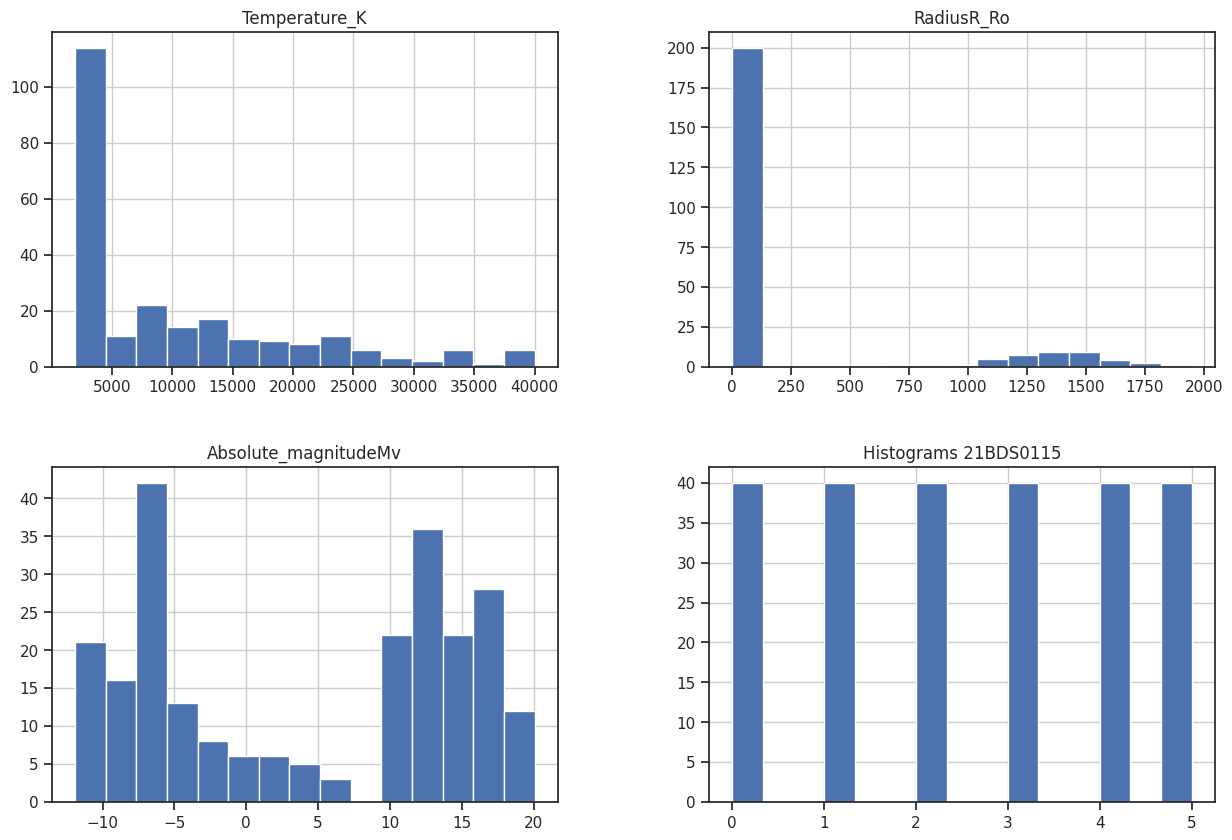

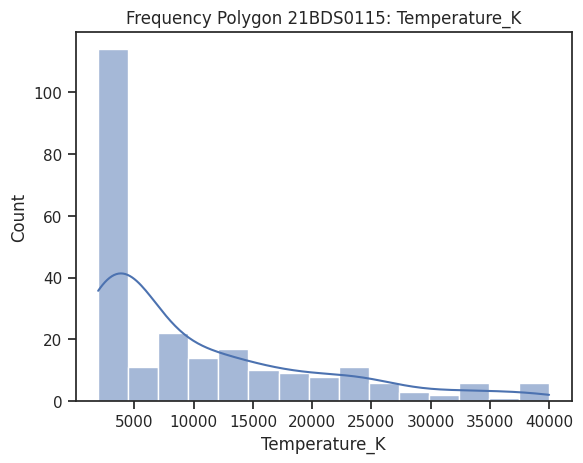

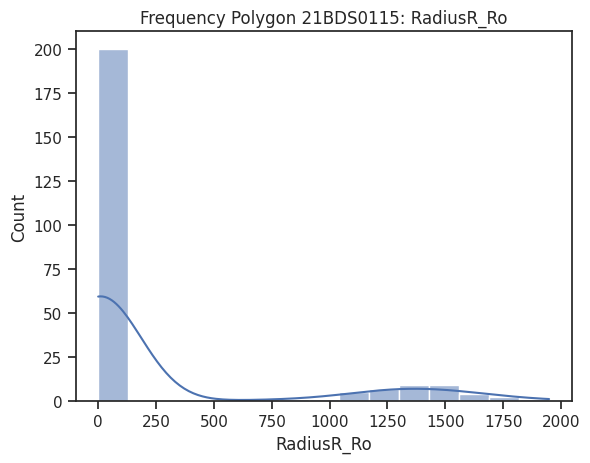

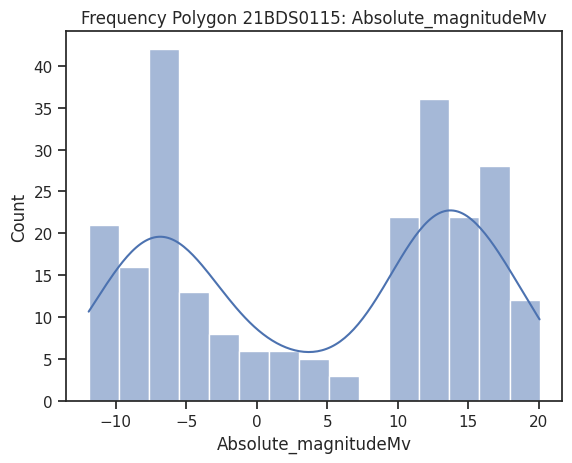

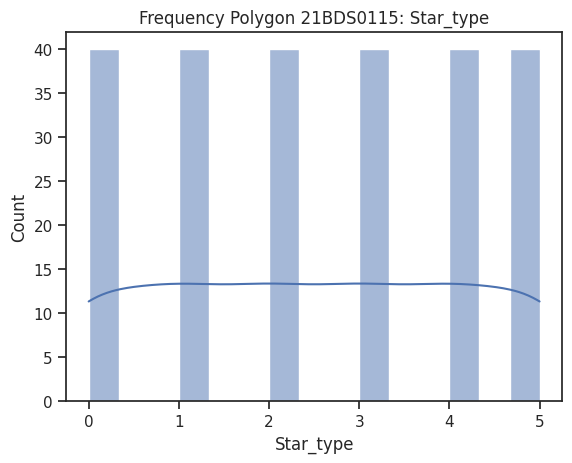

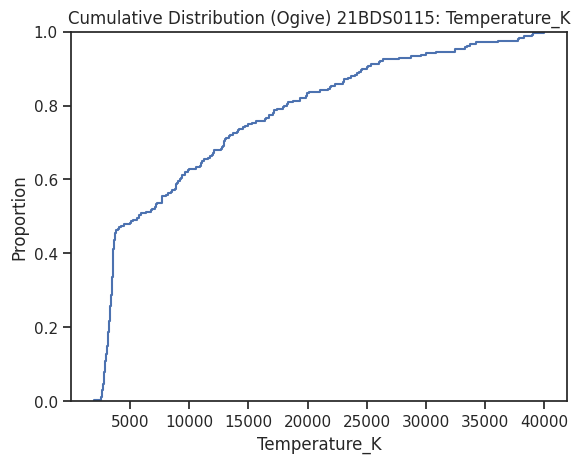

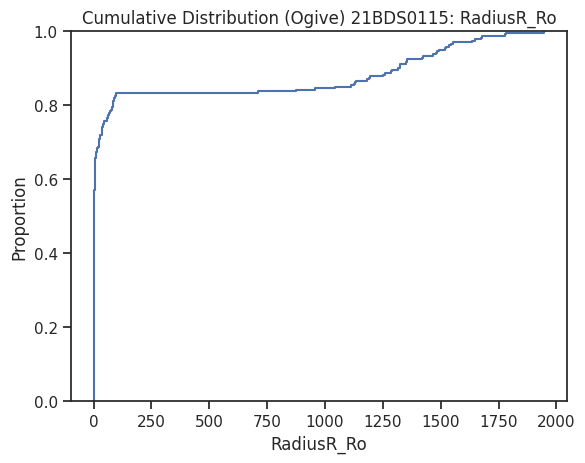

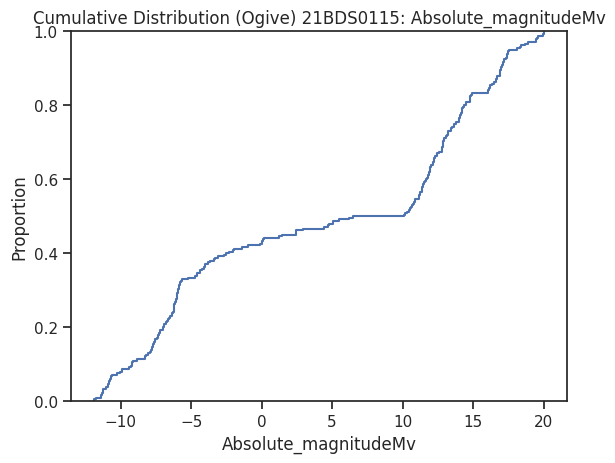

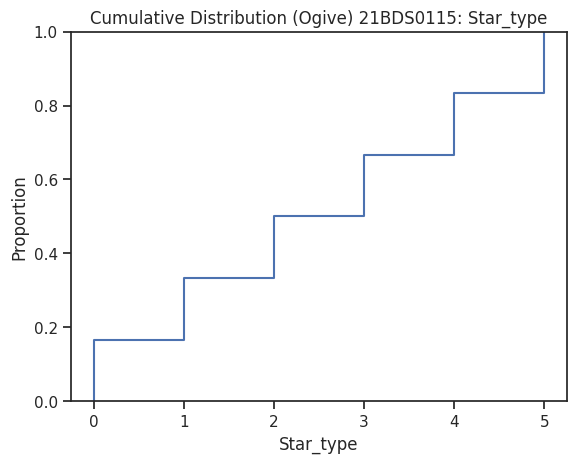

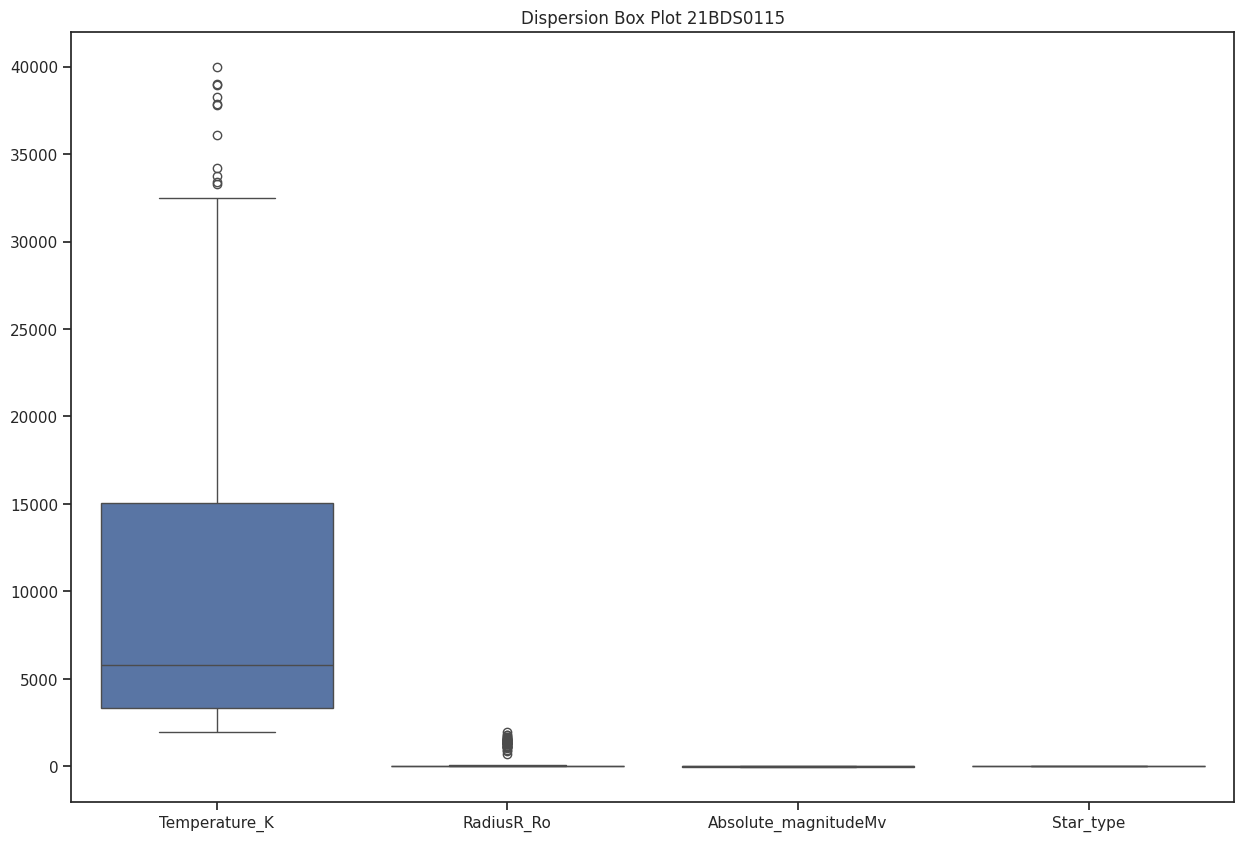

One of the columns 'Temperature_K' or 'Luminosity_Lo' does not exist.


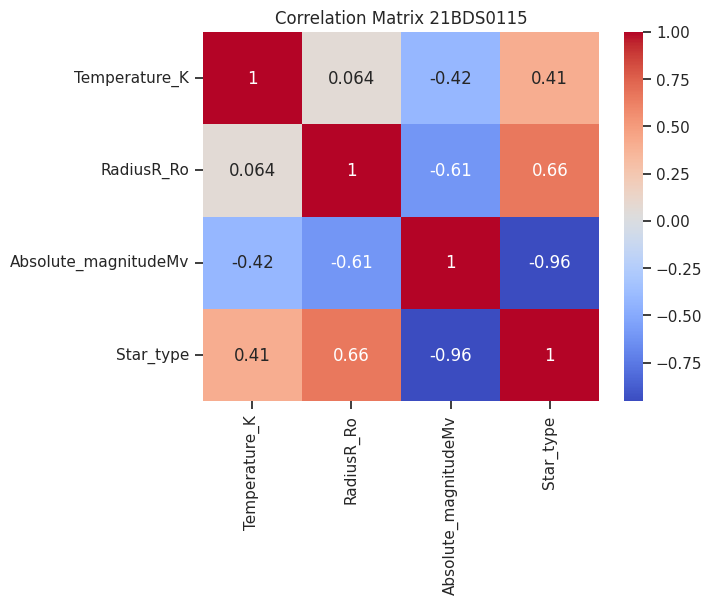

Chi-Square Statistic 21BDS0115: 450.12885087135095, p-value: 2.6703196566406742e-49


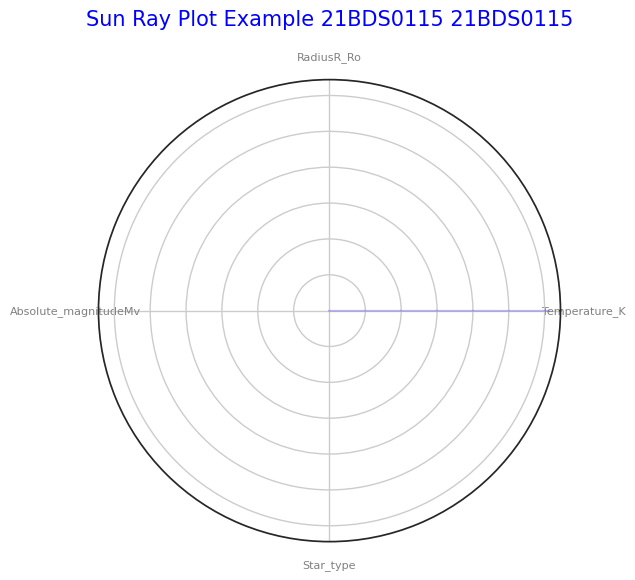

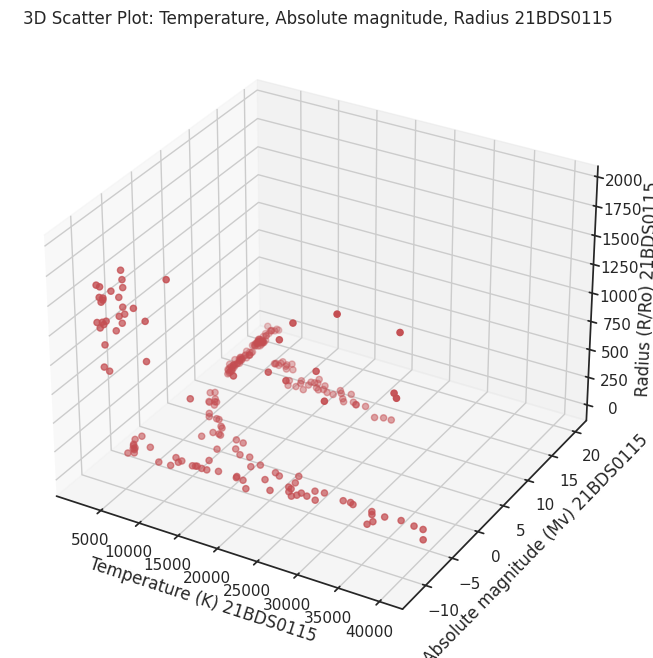

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


data = pd.read_csv('/content/stars type.csv')

# Display the original column names to verify
print("Original Column Names:")
print(data.columns.tolist())

# Strip all column names of leading/trailing spaces and format them
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')
print("Formatted Column Names:")
print(data.columns.tolist())


numeric_data = data.select_dtypes(include=[np.number])

# Check the numeric column names
print("Numeric Column Names 21BDS0115:")
print(numeric_data.columns.tolist())

# Descriptive Statistics for Numeric Columns Only
print("Mean 21BDS0115:\n", numeric_data.mean())
print("\nMedian 21BDS0115:\n", numeric_data.median())
print("\nMode 21BDS0115:\n", numeric_data.mode())
print("\nQuantiles 21BDS0115:\n", numeric_data.quantile([0.25, 0.5, 0.75]))
print("\nRange (Max-Min) 21BDS0115:\n", numeric_data.max() - numeric_data.min())
print("\nInterquartile Range (IQR) 21BDS0115:\n", numeric_data.quantile(0.75) - numeric_data.quantile(0.25))
print("\nMean Difference (Δ) 21BDS0115:\n", numeric_data.diff().mean())

#Skewness and Kurtosis
print("\nSkewness 21BDS0115:\n", numeric_data.skew())
print("\nKurtosis 21BDS0115:\n", numeric_data.kurt())

#  Histograms, Frequency Polygons, and Ogives (Cumulative Frequency)
# Plot histograms for numeric columns
numeric_data.hist(bins=15, figsize=(15, 10))
plt.title("Histograms 21BDS0115")
plt.show()

# Frequency polygon using seaborn
for column in numeric_data.columns:
    sns.histplot(numeric_data[column], bins=15, kde=True)
    plt.title(f"Frequency Polygon 21BDS0115: {column}")
    plt.show()

# Cumulative Frequency (Ogive)
for column in numeric_data.columns:
    sns.ecdfplot(numeric_data[column])
    plt.title(f"Cumulative Distribution (Ogive) 21BDS0115: {column}")
    plt.show()

# Dispersion Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title("Dispersion Box Plot 21BDS0115")
plt.show()

#  2D Scatter Plots and Correlations
# Scatter plot with error handling
luminosity_col = 'Luminosity_Lo'  # Adjusted column name
temperature_col = 'Temperature_K'   # Adjusted column name

if temperature_col in numeric_data.columns and luminosity_col in numeric_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(numeric_data[temperature_col], numeric_data[luminosity_col])
    plt.xlabel('Temperature (K) 21BDS0115')
    plt.ylabel('Luminosity (L/Lo) 21BDS0115')
    plt.title('Scatter Plot: Temperature vs Luminosity 21BDS0115')
    plt.show()
else:
    print(f"One of the columns '{temperature_col}' or '{luminosity_col}' does not exist.")

# Correlation Matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix 21BDS0115")
plt.show()

# Chi-Square Contribution (for Categorical Variables)
from scipy.stats import chi2_contingency

# Assuming you have categorical variables and a contingency table
contingency_table = pd.crosstab(data['Star_type'], data['Star_color'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic 21BDS0115: {chi2}, p-value: {p}")

# Sun Ray Plot
from math import pi

def sunray_plot(df_row, title):
    categories = list(df_row.index)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    values = df_row.values.flatten().tolist()
    values += values[:1]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.set_yticklabels([])
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.title(title + " 21BDS0115", size=15, color='blue', y=1.1)
    plt.show()

# Example with first row of your dataset (numeric columns)
sunray_plot(numeric_data.iloc[0], "Sun Ray Plot Example 21BDS0115")

# 3D Joint Analysis (Quantitative + 2 Categorical Variables)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = numeric_data['Temperature_K']
y = numeric_data['Absolute_magnitudeMv']
z = numeric_data['RadiusR_Ro']  # Adjusted column name

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Temperature (K) 21BDS0115')
ax.set_ylabel('Absolute magnitude (Mv) 21BDS0115')
ax.set_zlabel('Radius (R/Ro) 21BDS0115')
plt.title('3D Scatter Plot: Temperature, Absolute magnitude, Radius 21BDS0115')
plt.show()


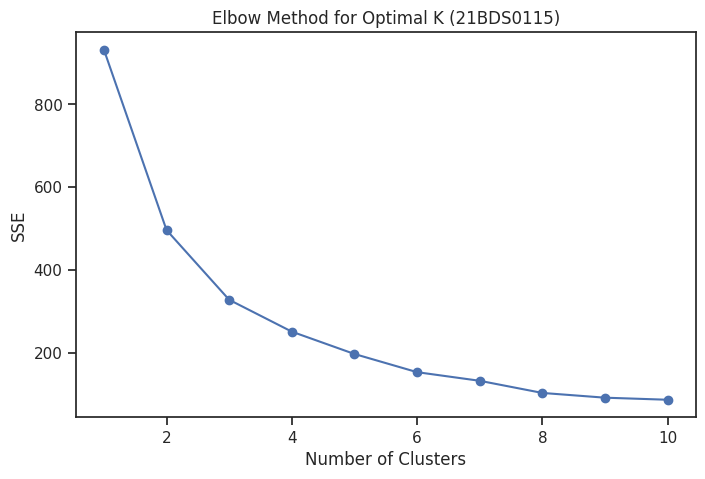

KMeans Silhouette Score: 0.52808539537485


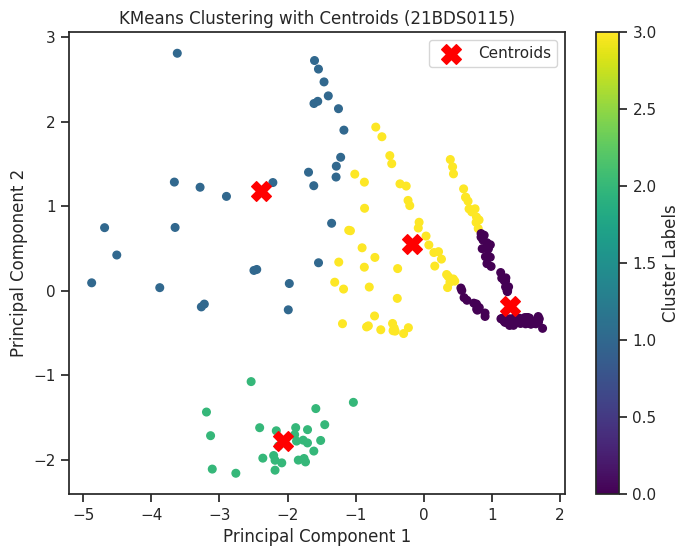

Agglomerative Clustering (complete) Silhouette Score: 0.49907394996668636
Agglomerative Clustering (single) Silhouette Score: 0.4913324747739964
Agglomerative Clustering (average) Silhouette Score: 0.5005515690980128


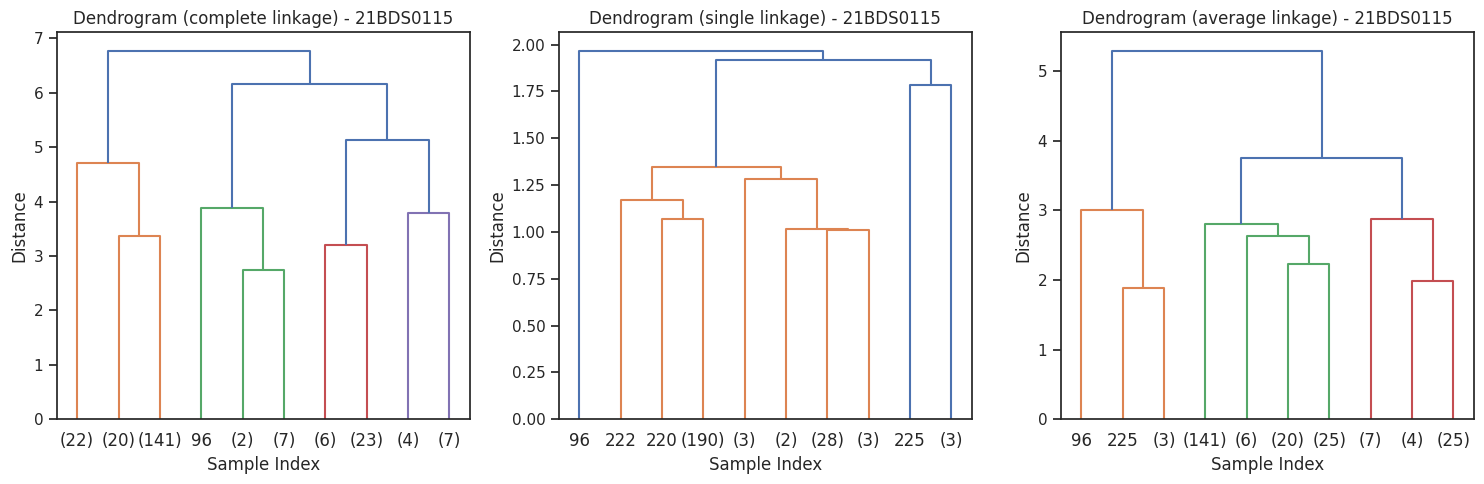

In [12]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

url = '/content/stars type.csv'
star_data = pd.read_csv(url)

star_data.columns = ["Temperature", "Luminosity", "Radius", "Absolute_magnitude", "Star_type", "Star_color", "Spectral_Class"]

# Replace '?' with NaN and drop rows with missing values
star_data.replace("?", np.nan, inplace=True)
star_data.dropna(inplace=True)

# Select numerical data and normalize it
numerical_data = star_data[["Temperature", "Luminosity", "Radius", "Absolute_magnitude"]].astype(float)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Elbow Plot for Optimal K in KMeans
sse = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, sse, marker='o')
plt.title("Elbow Method for Optimal K (21BDS0115)")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans Clustering with Optimal K
optimal_k = 4 # Replace with optimal K found using Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_data)
silhouette_avg = silhouette_score(normalized_data, kmeans_labels)
print(f"KMeans Silhouette Score: {silhouette_avg}")

# KMeans Cluster Visualization using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(normalized_data)

# Run KMeans clustering with optimal K (as determined from the elbow plot)
optimal_k = 4  # Replace with your optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(data_2d)
centroids = kmeans.cluster_centers_

# Plot KMeans clusters and centroids
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title("KMeans Clustering with Centroids (21BDS0115)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.colorbar(scatter, label="Cluster Labels")
plt.show()

# Agglomerative Clustering with Different Linkages
linkages = ['complete', 'single', 'average']
plt.figure(figsize=(15, 5))
for i, method in enumerate(linkages):
    plt.subplot(1, 3, i+1)
    agglom = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    agglom_labels = agglom.fit_predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, agglom_labels)
    print(f"Agglomerative Clustering ({method}) Silhouette Score: {silhouette_avg}")

    # Plot dendrogram
    linkage_matrix = linkage(normalized_data, method=method)
    dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
    plt.title(f"Dendrogram ({method} linkage) - 21BDS0115")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


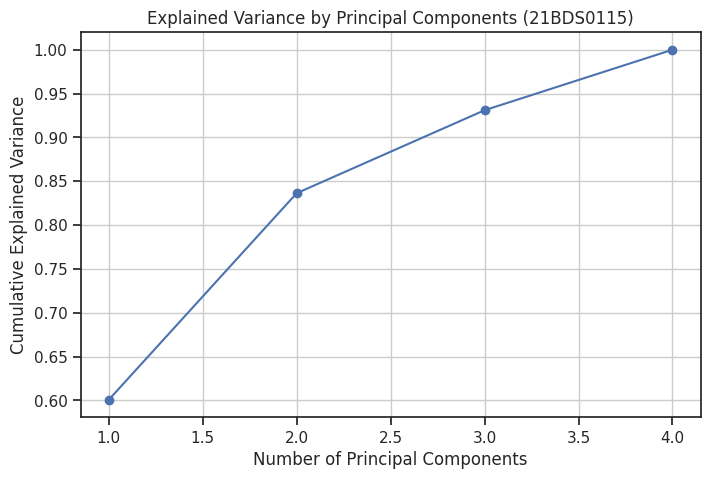

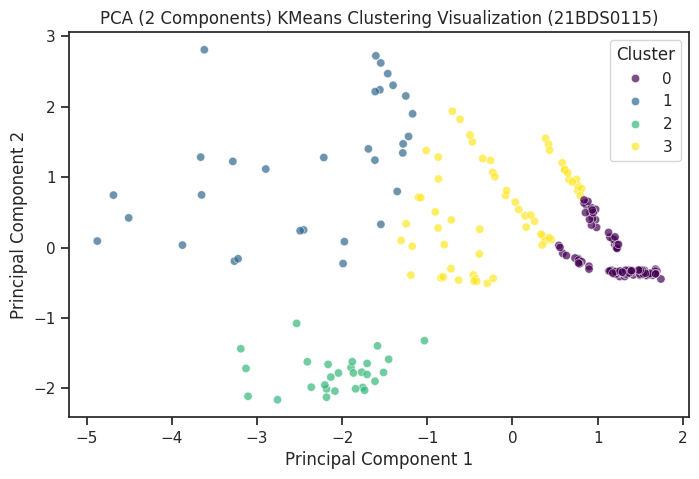

Principal Component 1: 60.08% variance explained
Principal Component 2: 23.56% variance explained
Principal Component 3: 9.46% variance explained
Principal Component 4: 6.90% variance explained
Shape of U: (233, 233)
Shape of Sigma: (4,)
Shape of VT: (4, 4)


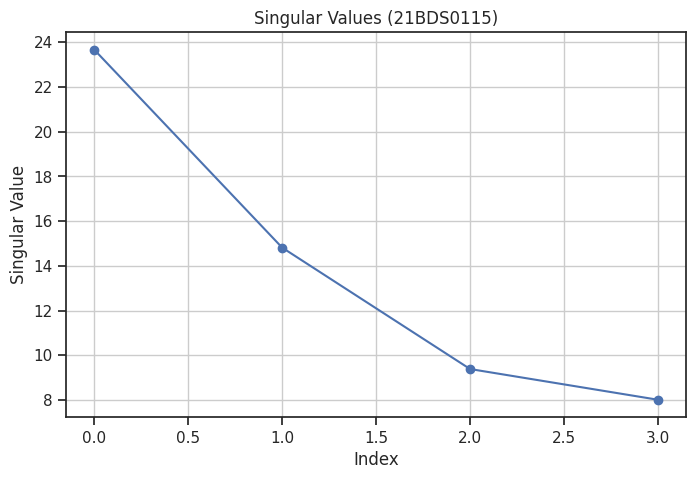

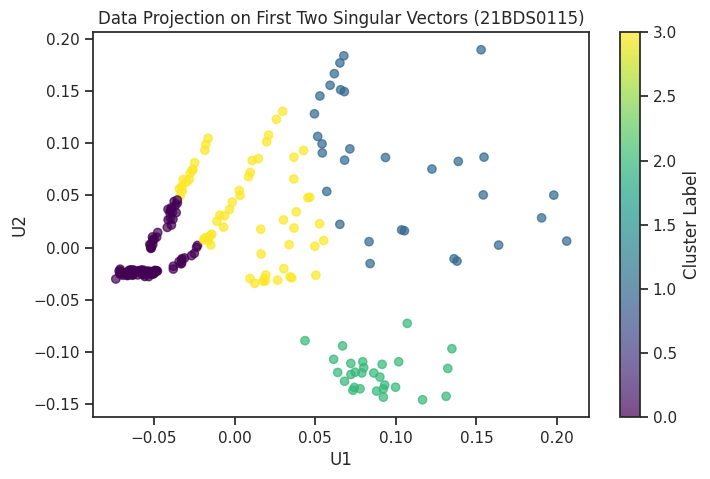

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import svd

url = '/content/stars type.csv'
star_data = pd.read_csv(url)


star_data.columns = ["Temperature", "Luminosity", "Radius", "Absolute_magnitude", "Star_type", "Star_color", "Spectral_Class"]

# Replace '?' with NaN and drop rows with missing values
star_data.replace("?", np.nan, inplace=True)
star_data.dropna(inplace=True)

# Select numerical columns and standardize them
numerical_data = star_data[["Temperature", "Luminosity", "Radius", "Absolute_magnitude"]].astype(float)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(normalized_data)

# Plot the explained variance by each principal component
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Principal Components (21BDS0115)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Visualize data in the first 2 principal components
pca_2d = PCA(n_components=2)
pca_data_2d = pca_2d.fit_transform(normalized_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data_2d[:, 0], y=pca_data_2d[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title("PCA (2 Components) KMeans Clustering Visualization (21BDS0115)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Print variance explained by each component
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var_ratio*100:.2f}% variance explained")

# Perform Singular Value Decomposition (SVD)
U, Sigma, VT = svd(normalized_data)

# Print shapes of SVD matrices
print("Shape of U:", U.shape)
print("Shape of Sigma:", Sigma.shape)
print("Shape of VT:", VT.shape)

# Visualize the first two singular vectors
plt.figure(figsize=(8, 5))
plt.plot(Sigma, marker='o')
plt.title("Singular Values (21BDS0115)")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

# Plotting the data points projected onto the first two singular vectors
plt.figure(figsize=(8, 5))
plt.scatter(U[:, 0], U[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title("Data Projection on First Two Singular Vectors (21BDS0115)")
plt.xlabel("U1")
plt.ylabel("U2")
plt.show()


R-squared (R²): 0.11434431882644203
Mean Squared Error (MSE): 25468905496.504986
Root Mean Squared Error (RMSE): 159589.8038613526


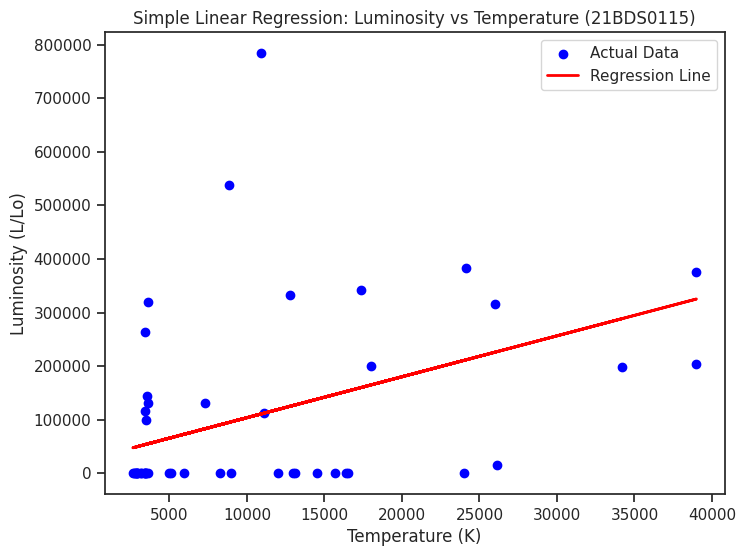

In [18]:
# Import necessary libraries for Linear Regression and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = '/content/stars type.csv'
star_data = pd.read_csv(url)

# Clean the data by replacing '?' with NaN, then dropping rows with NaN in relevant columns
star_data.replace('?', np.nan, inplace=True)
star_data.dropna(subset=['Temperature (K)', 'Luminosity(L/Lo)'], inplace=True)

# Convert columns to numeric (if they're not already)
star_data['Temperature (K)'] = pd.to_numeric(star_data['Temperature (K)'])
star_data['Luminosity(L/Lo)'] = pd.to_numeric(star_data['Luminosity(L/Lo)'])

# Prepare the data
X = star_data[['Temperature (K)']]  # Independent variable
y = star_data['Luminosity(L/Lo)']   # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the regression line with data points
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: Luminosity vs Temperature (21BDS0115)")
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L/Lo)")
plt.legend()
plt.show()
